### <font color='mediumvioletred'>  The Goal of This Code:
##### <font color='darkslateblue'> The objective of this code is to compare various image edge detection methods with the aim of finding the edges of watch numbers accurately. To achieve this goal, we will explore and evaluate different edge detection techniques. Additionally, we will incorporate denoising methods to ensure that the output is clear and free from any unwanted noise. By systematically comparing these methods, our aim is to produce high-quality edge detection results that effectively highlight the boundaries of the watch numbers in the images.

#### <font color='crimson'> Import necessary libraries

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### <font color='crimson'> Display a single image using Matplotlib.

In [26]:
def show_img_plt(img, fig_height=6, fig_width=8):
    plt.figure(figsize=(fig_height, fig_width))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

#### <font color='crimson'> Display multiple images using Matplotlib in a grid layout.

In [27]:
def show_mult_img_plt(rows, columns, img_list, titles=None, vmin=0, vmax=255):
    fig = plt.figure(figsize=(15, 10))
    for i in range(len(img_list)):
        ax = fig.add_subplot(rows, columns, i + 1)
        ax.imshow(img_list[i], cmap='gray', vmin=vmin, vmax=vmax)  # Added cmap='gray'
        ax.axis('off')
        if titles:
            ax.set_title(titles[i])
    plt.show()

#### <font color='crimson'> Read the image

In [28]:
img = cv2.imread('clock.png', cv2.IMREAD_GRAYSCALE)

#### <font color='crimson'> Show image

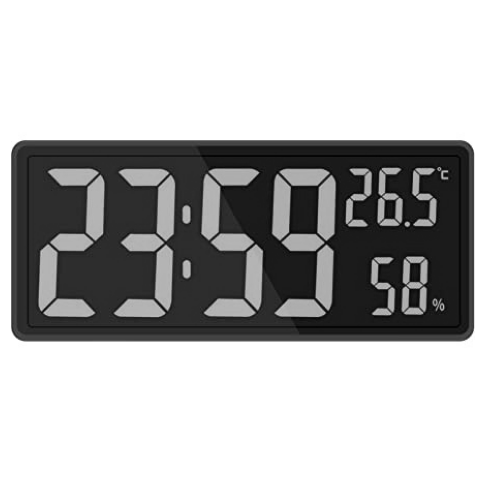

In [29]:
show_img_plt(img, fig_height=6, fig_width=8)

#### <font color='crimson'> Denoise using Gaussian blur

In [30]:
img_gaussian_blur = cv2.GaussianBlur(img, (5, 5), 0)

#### <font color='crimson'> Roberts Edge Detection

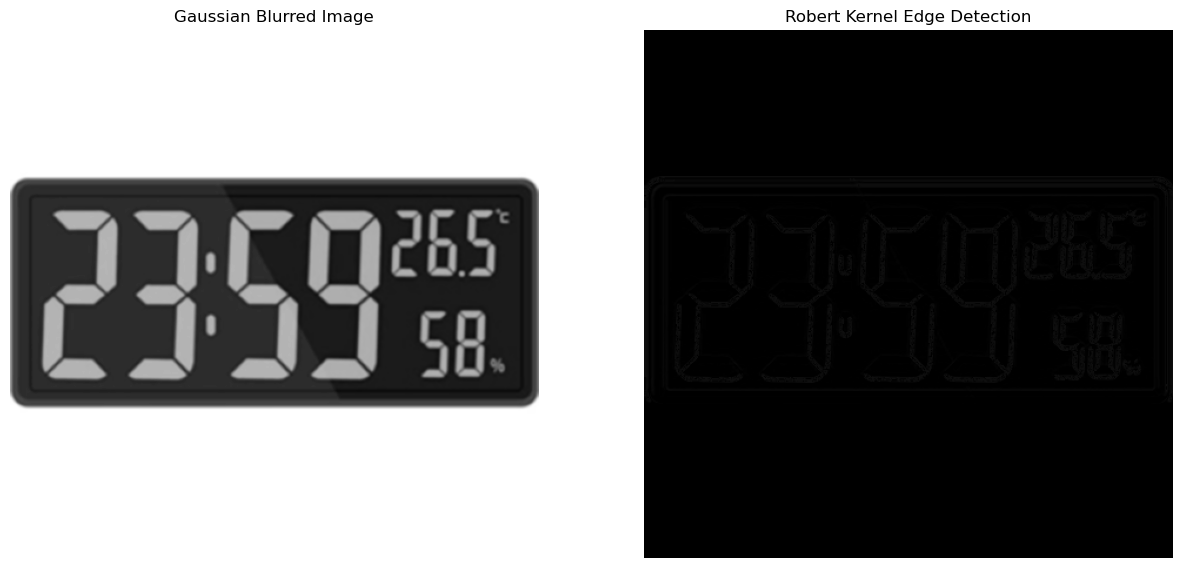

In [31]:
#Define Robert Kernels
robert_kernel_x = np.array([[1, 0], [0, -1]])
robert_kernel_y = np.array([[0, 1], [-1, 0]])

# Perform edge detection using the Robert Kernel
robert_x_edge = cv2.filter2D(img_gaussian_blur, -1, robert_kernel_x)
robert_y_edge = cv2.filter2D(img_gaussian_blur, -1, robert_kernel_y)

# Combine the x and y edge images to get the magnitude
robert_xy_edge = np.sqrt(np.square(robert_x_edge) + np.square(robert_y_edge))
# Display the Gaussian blurred image and the Robert Kernel edge-detected image side by side
show_mult_img_plt(1, 2, [img_gaussian_blur, robert_xy_edge], ['Gaussian Blurred Image', 'Robert Kernel Edge Detection'])

#### <font color='crimson'> Prewitt Edge Detection

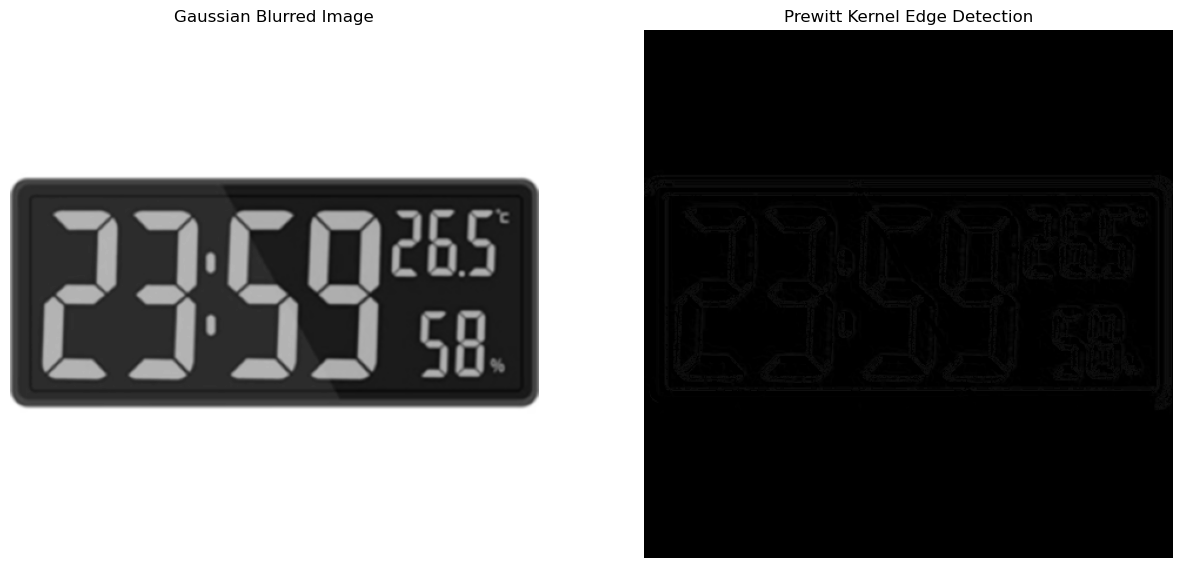

In [32]:
# Define Prewitt Kernels
prewitt_x_kernel = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)
prewitt_y_kernel = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float32)
prewitt_x_edge = cv2.filter2D(img_gaussian_blur, -1, prewitt_x_kernel)
prewitt_y_edge = cv2.filter2D(img_gaussian_blur, -1, prewitt_y_kernel)  # Corrected
# Combine the x and y edge images to get the magnitude
prewitt_xy_edge = np.sqrt(np.square(prewitt_x_edge) + np.square(prewitt_y_edge))
# Display the Gaussian blurred image, Robert Kernel edge-detected image, and Prewitt Kernel edge-detected image side by side
show_mult_img_plt(1, 2, [img_gaussian_blur, prewitt_xy_edge], ['Gaussian Blurred Image','Prewitt Kernel Edge Detection'])

#### <font color='crimson'> Sobel Edge Detection

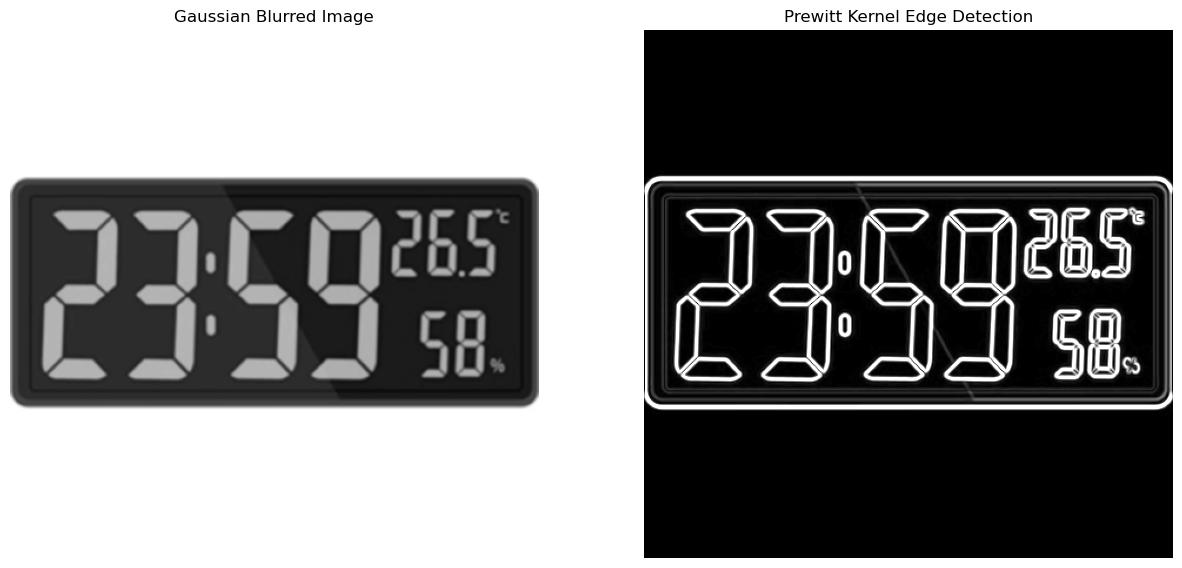

In [33]:
# Apply different edge detection methods
sobel_x = cv2.Sobel(img_gaussian_blur, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img_gaussian_blur, cv2.CV_64F, 0, 1, ksize=3)
sobel_xy_edge = np.sqrt(np.square(sobel_x) + np.square(sobel_y))
show_mult_img_plt(1, 2, [img_gaussian_blur, sobel_xy_edge], ['Gaussian Blurred Image','Prewitt Kernel Edge Detection'])

#### <font color='crimson'> Laplasian Edge Detection

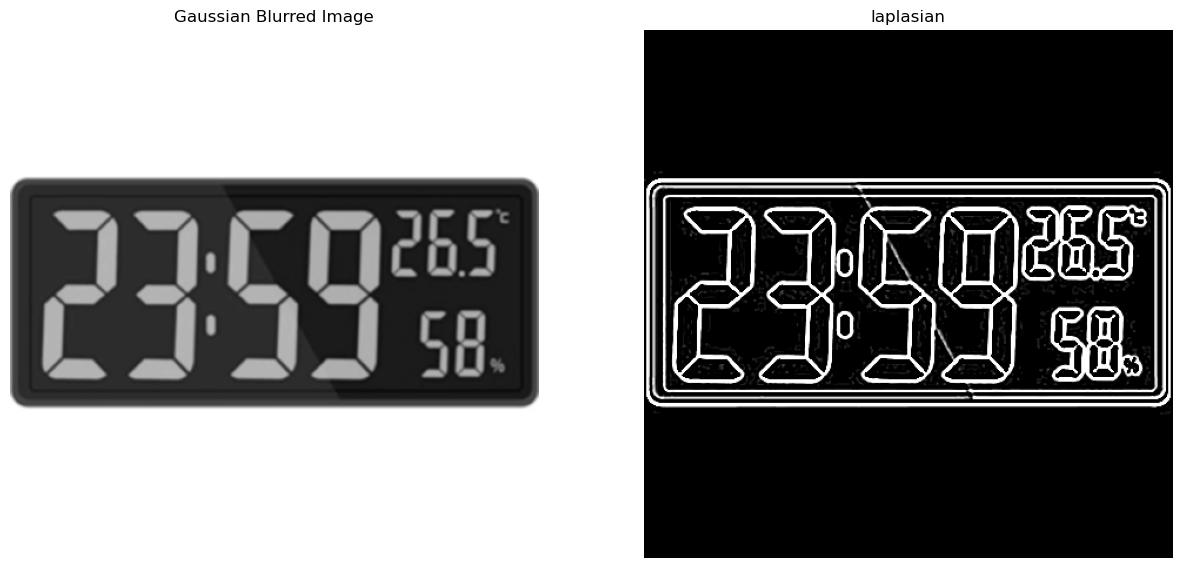

In [34]:
# Laplasian
laplasian_edge = cv2.Laplacian(img_gaussian_blur,-1, ksize = 5)
show_mult_img_plt(1, 2, [img_gaussian_blur, laplasian_edge], ['Gaussian Blurred Image', 'laplasian'])

#### <font color='crimson'> Canny Edge Detection

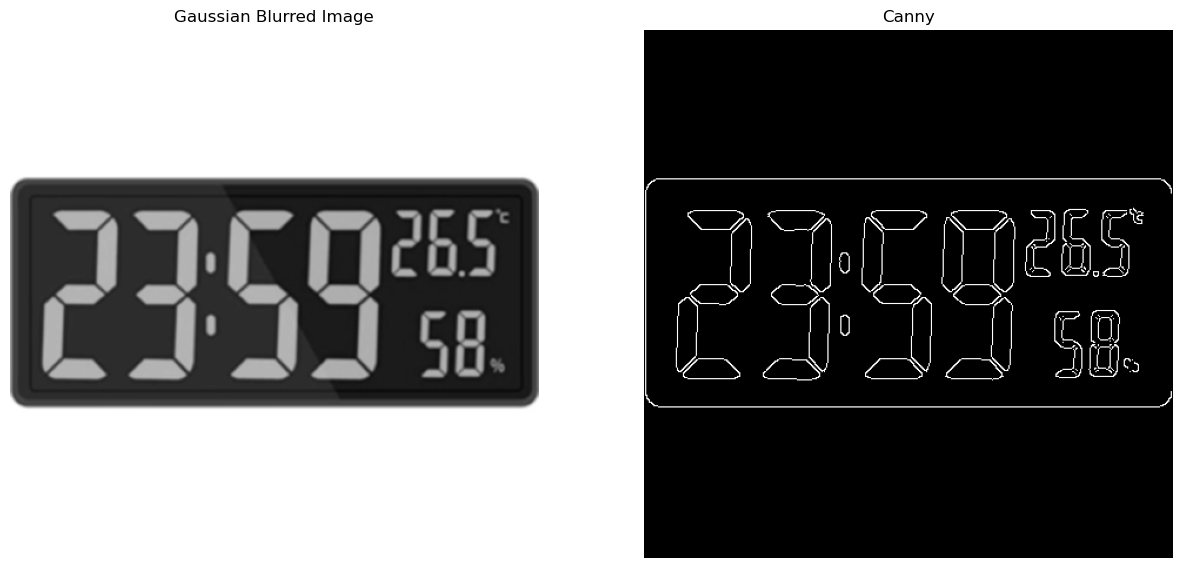

In [35]:
canny_edge = cv2.Canny(image = img_gaussian_blur , threshold1=245 , threshold2=250)
show_mult_img_plt(1, 2, [img_gaussian_blur, canny_edge], ['Gaussian Blurred Image', 'Canny'])

#### <font color='crimson'> Show and Comapre all edge detection methods

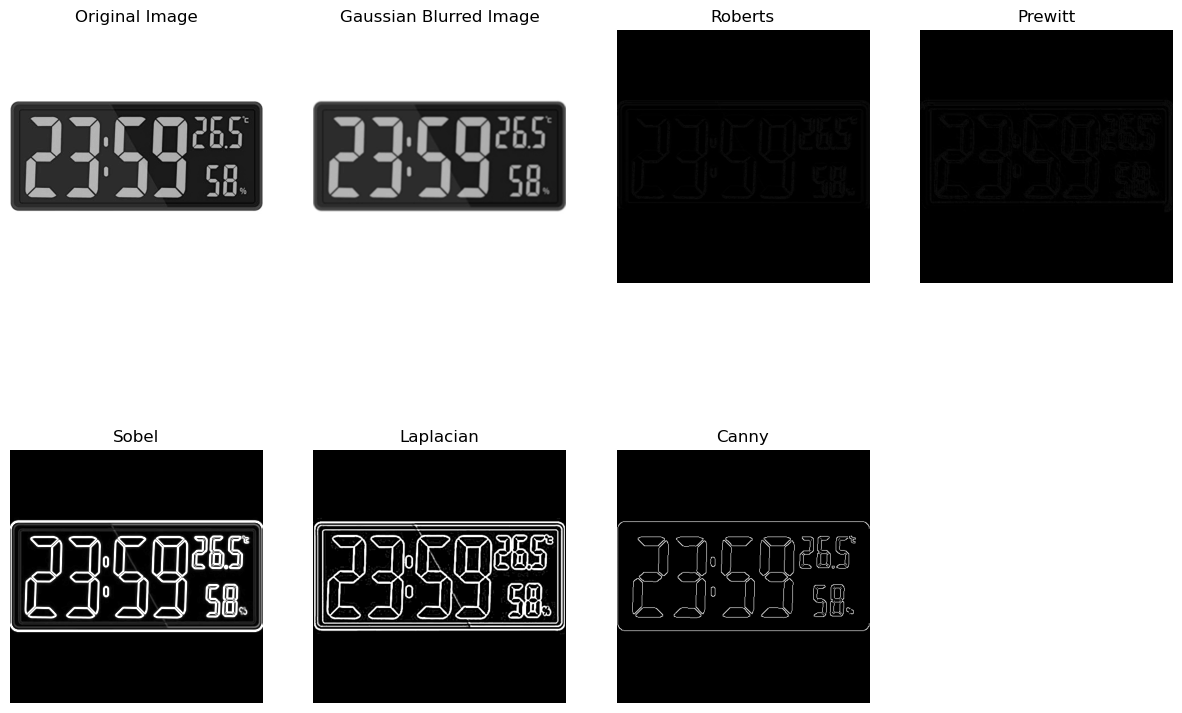

In [36]:
edge_images = [img, img_gaussian_blur, robert_xy_edge, prewitt_xy_edge,  sobel_xy_edge, laplasian_edge, canny_edge]
titles = ['Original Image', 'Gaussian Blurred Image','Roberts', 'Prewitt', 'Sobel','Laplacian', 'Canny']
show_mult_img_plt(2, 4, edge_images, titles)

### <font color='mediumvioletred'>  Conclusion:
#####  <font color='darkslateblue'> In our evaluation, we found that among the edge detection methods tested, Canny, Sobel, Laplacian, Roberts, and Prewitt, in that order, consistently produced the best results for detecting the edges of watch numbers. These methods effectively highlight the boundaries of objects in the images while minimizing noise and ensuring clarity.

##### <font color='darkslateblue'>  However, it's important to acknowledge that the effectiveness of edge detection algorithms can vary depending on factors such as the characteristics of the image, lighting conditions, and other environmental variables. While these methods ranked highest in our analysis, it's crucial to adapt the choice of edge detection approach based on the specific attributes of the input images and the desired output .

##### <font color='darkslateblue'>  By recognizing the strengths and limitations of each method, we can make informed decisions to optimize edge detection performance for different scenarios, ultimately enhancing the accuracy and reliability of our image processing tasks.